# Noise Generation

In this section, we are going to see how to add a noise to an image with Python.
**Noise**: Noise means random disturbance in a signal in a computer version. In our case, the signal is an image. Random disturbance in the brightness and color of an image is called Image noise. 

## Salt-and-pepper

It is found only in grayscale images (black and white image). As the name suggests salt (white) in pepper (black)–white spots in the dark regions or pepper (black) in salt (white)–black spots in the white regions. In other words, an image having salt-and-pepper noise will have a few dark pixels in bright regions and a few bright pixels in dark regions. Salt-and-pepper noise is also called impulse noise. It can be caused by several reasons like dead pixels, analog-to-digital conversion error, bit transmission error, etc.

- 'gaussian'
- 'localvar'
- 'poisson'
- 'salt'
- 'pepper'
- 's&p'
- 'speckle'

### add salt-and-pepper noise in an image (algorithm)

- Salt-and-pepper noise can only be added in a grayscale image. So, convert an image to grayscale after reading it
- Randomly pick the number of pixels to which noise is added (number_of_pixels)
- Randomly pick some pixels in the image to which noise will be added. It can be done by randomly picking x and y coordinate
- Note the random values generated must be within the range of the image dimensions. The x and y coordinates must be within the range of the image size
- Random numbers can be generated using random number generator functions like random.randint used in the code
- Color some randomly picked pixels as black setting their value to 0
- Color some randomly picked pixels as white setting their value to 255
- Save the value of the image

In [2]:
import numpy as np
import cv2
from skimage.util import random_noise
import matplotlib.pyplot as plt
import random


# Load the image
image = cv2.imread("dataset/cameraman.tif", 0)

In [3]:
def salt_and_pepper_noise(img):
 
    # Getting the dimensions of the image
    row , col = img.shape
     
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        img[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        img[y_coord][x_coord] = 0
         
    return img

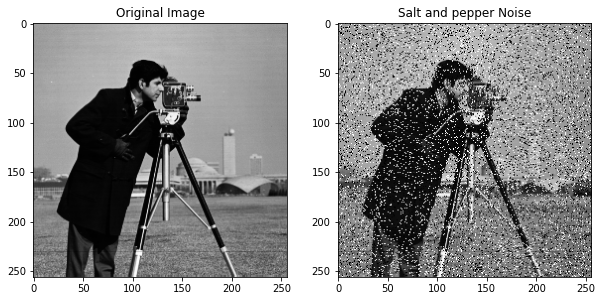

In [4]:
salt_and_pepper_noisy_img = salt_and_pepper_noise(image)

# Display images
plt.figure(figsize=(10, 10))
image = cv2.imread("dataset/cameraman.tif", 0)
plt.subplot(121), plt.title("Original Image")
plt.imshow(image, cmap="gray")

plt.subplot(122), plt.title("Salt and pepper Noise")
plt.imshow(salt_and_pepper_noisy_img, cmap="gray")

plt.show()

In [5]:
def add_salt_and_pepper_noise(img):
    
    # Add salt-and-pepper noise to the image.
    noise_img = random_noise(img, mode='s&p',amount=0.1)
    
    # The above function returns a floating-point image
    # on the range [0, 1], thus we changed it to 'uint8'
    # and from [0,255]
    noise_img = np.array(255*noise_img, dtype = 'uint8')


    # Display images
    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.title("Original Image")
    plt.imshow(img, cmap="gray")

    plt.subplot(122), plt.title("Salt and pepper Noise")
    plt.imshow(noise_img, cmap="gray")

    plt.show()

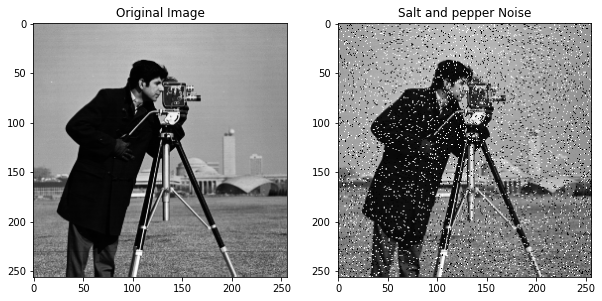

In [6]:
add_salt_and_pepper_noise(image)

### Gaussian noise

It is commonly known that Gaussian noise is statistical noise with a probability density function (PDF) equal to the normal distribution. Gaussian noise has a uniform distribution throughout the signal. 

A noisy image has pixels that are made up of the sum of their original pixel values plus a random Gaussian noise value. The probability distribution function for a Gaussian distribution has a bell shape. Additive white Gaussian noise is the most common application for Gaussian noise in applications.

The below figure shows the Gaussian distribution function (probability distribution function) of Gaussian noise and pixel representation of Gaussian noise. 

![gaussian](dataset/imgs/gaussian1.png)

Gaussian noise is a great approximation to noise we get from taking a photo. In other words, our sensoring equipment is sometimes affected by a veriety of factors. These are usually the quality of equipment and environmental conditions.

For instance, a charged coupled device – camera is sensitive to light levels and temperature changes. These affect the quality of photos the most. But they aren’t the only reason why we could get a corrupted image.

Our images can also get corrupted in the transmission. Most commonly when we’re transmitting wirelessly, where lightning and other atmospheric disturbances can physically influence our signal.

Gaussian noise
When we gather a large amount of data about a certain event or events in nature, we can often see the pattern of Gaussian distribution. We also call it normal distribution and we’re going to use it to calculate random values for our Gaussian noise.

The following formula is our Gaussian probability distribution function.

![gaussian](dataset/imgs/gaussian2.png)

If we look at the formula there are 3 unknown varibales, which are σ (sigma), y and μ (mi). Sigma and mi represent standard deviation and mean which affect the position and width of distributed values.

![gaussian](dataset/imgs/gaussian3.png)

As you can see from the formula that we use standard deviation to the power of 2, which is variance of the distribution. The only unknown we haven’t explained yet is y, which is our random variable. Therefore, we need to generate this number with random number generator class.

Point: sum of all calculated values in the distribution curve equals to 1. Therefore, we will also need to bring those values to displayable range for our image noise.

We can do that with formula for feature scaling which we already used before in tutorial for Laplacian filter in frequency domain.

![gaussian](dataset/imgs/gaussian4.png)

Once we generate Gaussian noise, we need to apply it to our image. We can do that by summing the image pixel values with generated noise value.


In [7]:
def add_gaussian_noise(img):
    
    # Add salt-and-pepper noise to the image.
    noise_img = random_noise(img, mode='gaussian', var=0.05)
    
    # The above function returns a floating-point image
    # on the range [0, 1], thus we changed it to 'uint8'
    # and from [0,255]
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    
    # Display images
    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.title("Original Image")
    plt.imshow(img, cmap="gray")

    plt.subplot(122), plt.title("Gaussian Noise")
    plt.imshow(noise_img, cmap="gray")

    plt.show()

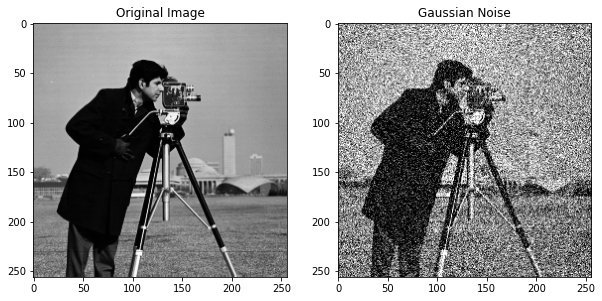

In [8]:
add_gaussian_noise(image)

In [9]:
def add_localvar_noise(img):
    
    # Add salt-and-pepper noise to the image.
    noise_img = random_noise(img, mode='localvar')
    
    # The above function returns a floating-point image
    # on the range [0, 1], thus we changed it to 'uint8'
    # and from [0,255]
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    
    # Display the noise image
    cv2.imshow('localvar',noise_img)
    cv2.waitKey(0)

In [10]:
def add_poisson_noise(img):
    
    # Add salt-and-pepper noise to the image.
    noise_img = random_noise(img, mode='poisson')
    
    # The above function returns a floating-point image
    # on the range [0, 1], thus we changed it to 'uint8'
    # and from [0,255]
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    
    # Display the noise image
    cv2.imshow('poisson',noise_img)
    cv2.waitKey(0)


In [11]:
def add_salt_noise(img):
    
    # Add salt-and-pepper noise to the image.
    noise_img = random_noise(img, mode='salt')
    
    # The above function returns a floating-point image
    # on the range [0, 1], thus we changed it to 'uint8'
    # and from [0,255]
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    
    # Display the noise image
    cv2.imshow('salt',noise_img)
    cv2.waitKey(0)


In [12]:
def add_pepper_noise(img):
    
    # Add salt-and-pepper noise to the image.
    noise_img = random_noise(img, mode='pepper')
    
    # The above function returns a floating-point image
    # on the range [0, 1], thus we changed it to 'uint8'
    # and from [0,255]
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    
    # Display the noise image
    cv2.imshow('pepper',noise_img)
    cv2.waitKey(0)

In [13]:

def add_speckle_noise(img):
    
    # Add salt-and-pepper noise to the image.
    noise_img = random_noise(img, mode='speckle')
    
    # The above function returns a floating-point image
    # on the range [0, 1], thus we changed it to 'uint8'
    # and from [0,255]
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    
    # Display the noise image
    cv2.imshow('speckle',noise_img)
    cv2.waitKey(0)
    

# Load the image
img = cv2.imread("dataset/cameraman.tif", 0)